#importing libraries:-

##keras:

pad\_sequences - pads sentences to same length

to\_categorical - for one-hot encoding

sequential - used for layering in model

<---->

##nltk (natural language toolkit)

word\_tokenize: text to individual words

porterstemmer: converts words to their root form (eg. running -> run)

wordnetlemmatizer: similar to porterstemmer but more meaningful than stemming

stopwords: list of stopwords which should be removed from text

numpy: numerical computations

pandas: provides structures like dataframes for data. used for data loading an manipulation

matplotlib's pyplot: create visualizations like line plots, bar charts, etc

strings: string functions

re: regular expressions, used for text cleaning

tensorflow: framework to build and train model

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import tensorflow as tf
from string import punctuation

Access files in google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


some useful downloads

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!wget --continue --tries=3 http://nlp.stanford.edu/data/glove.6B.zip

--2024-10-28 08:52:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-28 08:52:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-28 08:52:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 862182613 (822M), 733879773 (700M) remaining [applica

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
file = open('glove.6B.100d.txt', 'r', encoding='utf-8')
content = file.readlines()
file.close()

In [ ]:
embeddings = {}

for line in content:
    split_line = line.split()
    word = split_line[0]
    embedding = np.array([float(val) for val in split_line[1:]])
    embeddings[word] = embedding

kagglehub module is used to access datasets from kaggle directly

In [ ]:
import kagglehub
path = kagglehub.dataset_download("saurabhshahane/twitter-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.60M/7.60M [00:01<00:00, 5.41MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurabhshahane/twitter-sentiment-dataset/versions/1


copy downloaded dataset from cache location to current directory

In [ ]:
!cp -r ../root/.cache/kagglehub/datasets/saurabhshahane/twitter-sentiment-dataset/versions/1 .

define path to csv

read csv

In [ ]:
train_path = '1/data.csv'

train_data = pd.read_csv(train_path)

In [ ]:
columns = train_data.columns
columns

Index(['clean_text', 'category'], dtype='object')

In [ ]:
columns = ['text','label']
train_data.columns = columns

In [ ]:
train_data.head()

,text,label
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


whats this???

In [ ]:
for txt in train_data['text'][:10]:
  print(txt)

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
talk all the nonsense and continue all the drama will vote for modi 
what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars
answer who among these the most powerful world leader today trump putin modi may 
kiya tho refresh maarkefir comment karo 
surat women perform yagna seeks divine grace for narendra modi become again

this comes from cabinet which has scholars like modi smriti and hema time introspect
with upcoming election india saga going important pair look current modi leads govt elected with deal br

get count of all unique labels

In [ ]:

train_data['label'].value_counts()

,count
label,
1.0,72250
0.0,55213
-1.0,35510


In [ ]:
min = train_data['label'].value_counts().min()
min

35510

In [ ]:
min_label_count = train_data['label'].value_counts().min()
new_train_data = pd.DataFrame(columns=['text', 'label'])

for label in train_data['label'].unique():
  label_data = train_data[train_data['label'] == label]
  reduced_label_data = label_data.head(min_label_count)

  new_train_data = pd.concat([new_train_data, reduced_label_data])

print(new_train_data['label'].value_counts())

new_train_data.value_counts()

<ipython-input-22-b8157822b3ad>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_train_data = pd.concat([new_train_data, reduced_label_data])


label
-1.0    35510
 0.0    35510
 1.0    35510
Name: count, dtype: int64


,,count
text,label,
\n congress 72000 india watch agen rahul gaddha \n,0.0,1
sapna chaudhary dancer but sonia gandhi was not bar dancer she was working bar maid per research done her which means she was waitress she was more like modi modi chaiwala she was daruwali,1.0,1
sad for modi haters,-1.0,1
sad for even dont support bjp such but the truth that agar pulwama bhi hota modi jeet people dont know ground realities india and just make own narrative which doesnt sell outside borders other countries,-1.0,1
sad for all those long distance pakistani couples whose skype wont work cuz modi shot down,-1.0,1
...,...,...
india the 4th country achieve thanks for keeping safejai hind,1.0,1
india tests space missile shoots down satellite modi announces mission shakti the news minute,-1.0,1
india tests space missile shoots down satellite modi announces,-1.0,1


In [ ]:
new_train_data = new_train_data.sample(frac=1).reset_index(drop=True)
new_train_data.head()

,text,label
0,modi didnt boast his achievement ever address ...,0.0
1,can congress chamchas and piddis answer this w...,0.0
2,see your twitts feel like modi government tota...,-1.0
3,omg thats coolmodi will soon announce month mo...,0.0
4,kyo jalti tumhari har chij anyways what can ex...,0.0


text proccessing


In [ ]:
train_data = new_train_data

In [ ]:

train_data['text'] = train_data['text'].str.lower()
train_data.head()

,text,label
0,modi didnt boast his achievement ever address ...,0.0
1,can congress chamchas and piddis answer this w...,0.0
2,see your twitts feel like modi government tota...,-1.0
3,omg thats coolmodi will soon announce month mo...,0.0
4,kyo jalti tumhari har chij anyways what can ex...,0.0


get all unique labels

In [ ]:
train_data['label'] = train_data['label'].apply(lambda x: int(x+1))
train_data.head()

,text,label
0,modi didnt boast his achievement ever address ...,1
1,can congress chamchas and piddis answer this w...,1
2,see your twitts feel like modi government tota...,0
3,omg thats coolmodi will soon announce month mo...,1
4,kyo jalti tumhari har chij anyways what can ex...,1


In [ ]:
labels = train_data['label'].unique()
labels = list(labels)
labels.sort()
labels

[0, 1, 2]

Assign a number to each label

Lemmatizer: reduce word to root form


*   Removes all non-alphabetic characters
*   replace newlines with spaces
*   remove multiple spacces
*   tokenize text into individual words
*   applies lemmatization to each token, reducing to base form
*   filters out words not present in 'embeddings' vocabulary







In [ ]:
lemmatizer=WordNetLemmatizer()

def preprocessing(text):
    if not isinstance(text, str):
        return ''

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    cleaned_text = word_tokenize(cleaned_text)
    filtered_words = [lemmatizer.lemmatize(word, pos='v') for word in cleaned_text]

    filtered_words = [word for word in filtered_words if word in embeddings]

    text = ' '.join(filtered_words)
    return text

text = train_data['text'][:10]
result = text.apply(preprocessing)
result

,text
0,modi didnt boast his achievement ever address ...
1,can congress and answer this why patriots wan ...
2,see your feel like modi government totally use...
3,omg thats will soon announce month modi modi modi
4,kyo har chij anyways what can expect from fan ...
5,modi character totally match with hitler germa...
6,single window clearance under startup india al...
7,rajdeep disgrace and have clear anti modi dont...
8,modi might announce about major military opera...
9,when modi lose the come election will treat sa...


 calling the above function


In [ ]:
train_data['text']=train_data['text'].apply(preprocessing)

Check

In [ ]:
for txt in train_data['text'][:10]:
  print(txt)

modi didnt boast his achievement ever address the nation never talk this govts achievement too still team fall into the trap
can congress and answer this why patriots wan na contest against gandhis and bharat tere type wan na their ally
see your feel like modi government totally useless only negative things be happen these five year why
omg thats will soon announce month modi modi modi
kyo har chij anyways what can expect from fan pappu
modi character totally match with hitler germany who have ruin germany and modi have ruin india through his assault all institutions republican india all obc and minority category people must unite and remove modi from india
single window clearance under startup india already there angle tax bring under your govt already be look into tax for years for startups already there also mudra loan and minute loan for be there thank you but want only modi govt
rajdeep disgrace and have clear anti modi dont you something about
modi might announce about major mili

Check for null values

In [ ]:
train_data.isnull().sum()

,0
text,0
label,0




```
# This is formatted as code
```



In [ ]:
X = train_data['text']
Y = train_data['label']

tokenize the text

get maxlen of a sentence


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [ ]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen

In [ ]:
Xtokens = tokenizer.texts_to_sequences(X)
maxlen = get_maxlen(Xtokens)
print(maxlen)

50


pad all sentences to maxlen

In [ ]:
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')
Xtrain.shape

(106530, 50)

In [ ]:
Ytrain = to_categorical(Y)
Ytrain.shape

(106530, 3)

In [ ]:
Ytrain[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
embed_size = 100
embedding_matrix = np.zeros((len(word2index) + 1, embed_size))

for word, i in word2index.items():
    if word in embeddings:
        embedding_matrix[i] = embeddings[word]
    else:
        print(word)
        embedding_matrix[i] = np.random.normal(0, 1, embed_size)


This code defines a Keras sequential model for text classification, likely sentiment analysis. Here's a step-by-step explanation:

**model = Sequential(...): **
This initializes a sequential model, where layers are stacked one after another.

**Embedding(...):**

This layer converts words into dense vector representations (word embeddings).
input_dim: Size of the vocabulary (number of unique words + 1).
output_dim: Dimensionality of the word embeddings (e.g., 100).
input_length: Maximum length of input sequences (number of words in a sentence).
weights: Initializes the embedding layer with pre-trained word embeddings from embedding_matrix.
trainable=False: Freezes the embedding layer, preventing its weights from being updated during training.
**Bidirectional(LSTM(128, return_sequences=True)):**

This is a Bidirectional LSTM (Long Short-Term Memory) layer, which processes the input sequence in both forward and backward directions to capture contextual information.
128: Number of LSTM units in the layer.
return_sequences=True: Outputs a sequence for each input, allowing subsequent LSTM layers to process the output.
**Dropout(0.2):**

A dropout layer randomly sets a fraction of input units to 0 during training to prevent overfitting.
0.2: Dropout rate (20% of units will be dropped).
The model has multiple Bidirectional LSTM layers with decreasing units (128, 64, 32), followed by dropout layers for regularization.

**LSTM(units=16, return_sequences=False):**

A final LSTM layer with 16 units.
return_sequences=False: Outputs a single vector for the entire input sequence.
**Dense(Ytrain.shape[1], activation='softmax'):**

A dense (fully connected) layer that produces the final output.
Ytrain.shape[1]: Number of output classes.
activation='softmax': Applies a softmax function to the output, producing probabilities for each class.
In essence, this model takes text as input, embeds words into vectors, processes the sequence using bidirectional LSTMs to capture context, and finally predicts the class using a dense layer with a softmax activation. The dropout layers help prevent overfitting during training.

In [ ]:
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
             ),

    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.2),
    LSTM(units = 16, return_sequences = False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(Ytrain.shape[1], activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       2,762,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,762,400 (10.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,762,400 (10.54 MB)

In [ ]:
history = model.fit(Xtrain, Ytrain, epochs = 15, batch_size = 32, validation_split = 0.15)

Epoch 1/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 92s 30ms/step - accuracy: 0.5192 - loss: 0.9421 - val_accuracy: 0.7482 - val_loss: 0.6395
Epoch 2/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 138s 29ms/step - accuracy: 0.7888 - loss: 0.5725 - val_accuracy: 0.8700 - val_loss: 0.3770
Epoch 3/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.8696 - loss: 0.3829 - val_accuracy: 0.8971 - val_loss: 0.3012
Epoch 4/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9023 - loss: 0.2960 - val_accuracy: 0.9125 - val_loss: 0.2637
Epoch 5/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9175 - loss: 0.2522 - val_accuracy: 0.9190 - val_loss: 0.2423
Epoch 6/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 146s 31ms/step - accuracy: 0.9277 - loss: 0.2179 - val_accuracy: 0.9197 - val_loss: 0.2458
Epoch 7/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 140s 30ms/step - accuracy: 0.9347 - loss: 0.1964 - val_accuracy: 0.9215 - val_loss: 0.2425
Epoch 8/15
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 136s 28ms/step - accuracy: 0.94

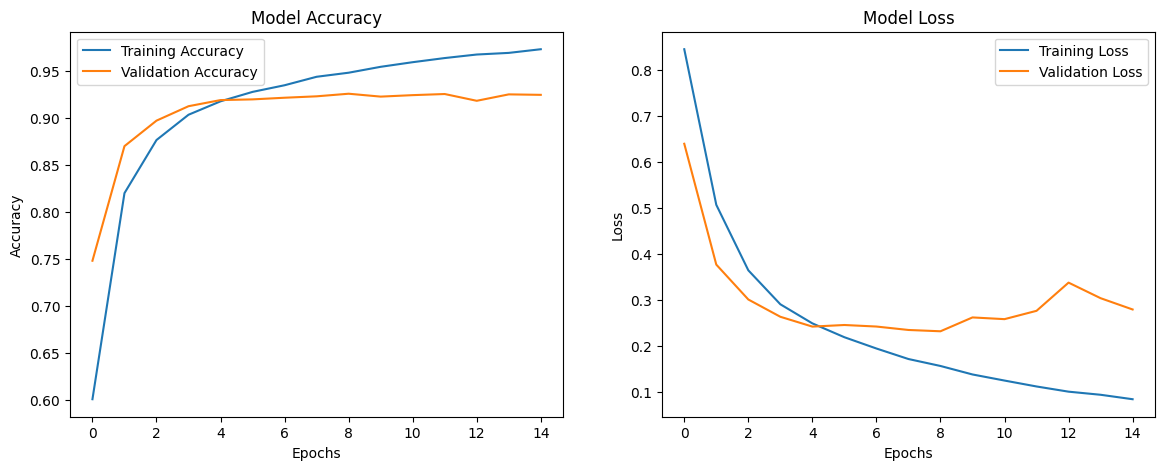

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
def predict(input):
  input = pd.DataFrame(input, columns=['text'])
  input['text'] = input['text'].apply(preprocessing)
  print(input['text'])
  input = tokenizer.texts_to_sequences(input['text'])
  input = pad_sequences(input, maxlen = maxlen,  padding = 'post', truncating = 'post')
  prediction = model.predict(input)
  prediction = np.argmax(prediction, axis=1)
  return prediction


In [ ]:

input = ["Another five years of this leadership will take India backward, not forward."]
pre = predict(input)
pre


0    five years of this leadership will take backwa...
Name: text, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([0])

In [ ]:
model.save('model.h5')


## New Data
**Follow The Step to train on new Big data**


---


=> add shortcut of this [Models Folder](https://drive.google.com/drive/folders/1eXL6T7X5uLs_Ve4FgQ6JrSsGisbzXw4A?usp=sharing) to your "My Drive"

=> goto to below cell

=> from toolbar select Runtime -> Run Cell and Below

=> wait till the proccess is finished

In [ ]:
import tensorflow as tf
if (tf.__version__ != '2.15.0'):
  !pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!python -V

Python 3.10.12


In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding, Dropout, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import json
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from string import punctuation

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lemmatizer=WordNetLemmatizer()

def preprocessing(text):
    if not isinstance(text, str):
        return ''


    cleaned_text = re.sub(r'(http|https|www)\S+', '', text)
    cleaned_text = re.sub(r'[@#]\w+', '', cleaned_text)

    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.replace('\n', ' ')
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    cleaned_text = word_tokenize(cleaned_text)
    filtered_words = [lemmatizer.lemmatize(word, pos='v') for word in cleaned_text]

    text = ' '.join(filtered_words)
    return text

In [ ]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen

In [ ]:

!cp /content/drive/MyDrive/Machine_learning_data/Xtrain.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/Xtest.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/Ytrain.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/Ytest.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/tokenizer.pickle ./
!cp /content/drive/MyDrive/Machine_learning_data/model.h5 ./
!cp /content/drive/MyDrive/Machine_learning_data/history.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/word2index.pickle ./
!cp /content/drive/MyDrive/Machine_learning_data/embedding_metrix.npy ./
!cp /content/drive/MyDrive/Machine_learning_data/tokenizer.json ./
!cp /content/drive/MyDrive/Machine_learning_data/model.keras ./

In [ ]:

import pickle
with open('word2index.pickle', 'rb') as handle:
    word2index = pickle.load(handle)
embedding_matrix = np.load('embedding_metrix.npy')
Xtrain = np.load('Xtrain.npy')
Xtest = np.load('Xtest.npy')
Ytrain = np.load('Ytrain.npy')
Ytest = np.load('Ytest.npy')
history = np.load('history.npy', allow_pickle='TRUE').item()
with open('tokenizer.json', 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)

In [ ]:
word2index = tokenizer.word_index

In [ ]:
embed_size = 100
maxlen = 41

In [ ]:
!cp /content/drive/MyDrive/models/my_model.h5 ./
!cp /content/drive/MyDrive/models/my_model.keras ./
!cp /content/drive/MyDrive/models/my_model.weights.h5 ./
!cp /content/drive/MyDrive/models/my_model.pickle ./
!cp /content/drive/MyDrive/models/my_model.json ./
!cp /content/drive/MyDrive/models/my_model_config.json ./

In [ ]:
model = load_model('my_model.h5')

In [ ]:
history = model.fit(Xtrain, Ytrain, epochs = 5, batch_size = 32)

Epoch 1/5
39466/39466 [==============================] - 1294s 33ms/step - loss: 0.3692 - accuracy: 0.8357
Epoch 2/5
39466/39466 [==============================] - 1295s 33ms/step - loss: 0.3669 - accuracy: 0.8370
Epoch 3/5
39466/39466 [==============================] - 1289s 33ms/step - loss: 0.3651 - accuracy: 0.8378
Epoch 4/5
39466/39466 [==============================] - 1286s 33ms/step - loss: 0.3641 - accuracy: 0.8381
Epoch 5/5
39466/39466 [==============================] - 1288s 33ms/step - loss: 0.3622 - accuracy: 0.8392


In [ ]:
model.export('my_model')
model.save('my_model.h5')
model.save('my_model.keras')
model.save_weights('my_model.weights.h5')

import pickle
with open('my_model.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

model_json = model.to_json()
with open('my_model.json', 'w') as json_file:
    json_file.write(model_json)

model_config = model.get_config()
with open('my_model_config.json', 'w') as json_file:
    json.dump(model_config, json_file)

!cp my_model.h5 /content/drive/MyDrive/models/
!cp my_model.keras /content/drive/MyDrive/models/
!cp my_model.weights.h5 /content/drive/MyDrive/models/
!cp my_model.pickle /content/drive/MyDrive/models/
!cp my_model.json /content/drive/MyDrive/models/
!cp my_model_config.json /content/drive/MyDrive/models/
!cp -r my_model /content/drive/MyDrive/models/

Saved artifact at 'my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None), dtype=tf.float32, name='embedding_input')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140201727236000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591674960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591665616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591666320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591660336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591661920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591663328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201594561888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201594561008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201594559776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140201591658048: TensorSpe

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Generate predictions for the test set
Ypred = model.predict(Xtest)

# Convert predictions and ground truth from one-hot encoding to class labels
Ypred_classes = Ypred.argmax(axis=1)
Ytrue_classes = Ytest.argmax(axis=1)

# Calculate accuracy
accuracy = np.mean(Ypred_classes == Ytrue_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(Ytrue_classes, Ypred_classes)
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Ytrue_classes, Ypred_classes)
print("Confusion Matrix:\n", conf_matrix)

9867/9867 [==============================] - 58s 5ms/step
Accuracy: 81.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82    157670
           1       0.82      0.81      0.82    158053

    accuracy                           0.82    315723
   macro avg       0.82      0.82      0.82    315723
weighted avg       0.82      0.82      0.82    315723

Confusion Matrix:
 [[129585  28085]
 [ 29353 128700]]


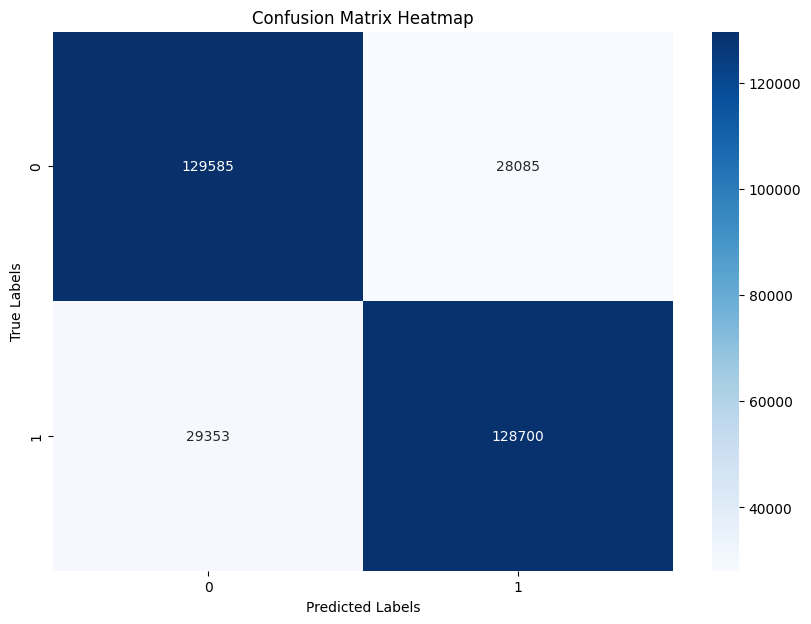

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

<ipython-input-23-58546a0e4006>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='F1-Score', data=df, palette='viridis')


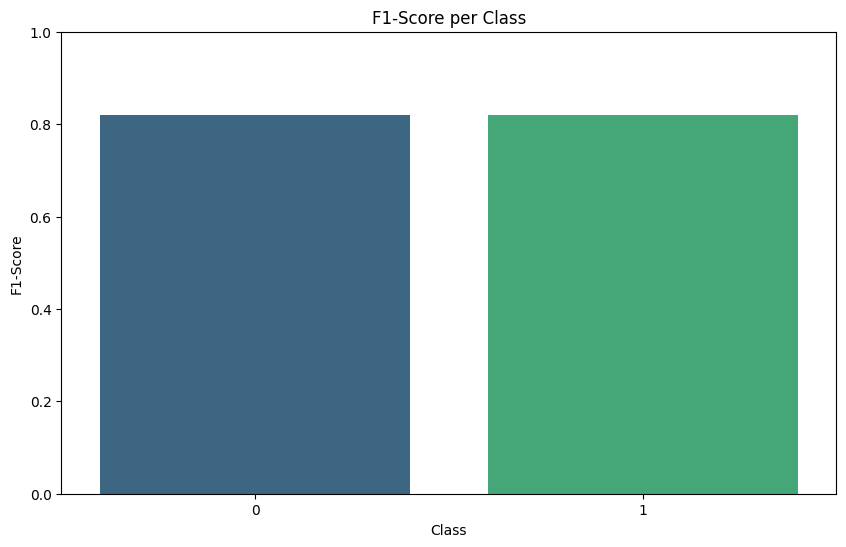

In [ ]:

report_data = []
lines = report_text.strip().split('\n')
for line in lines[2:-3]:
    row_data = line.split()
    if len(row_data) < 5:
        continue
    class_name = row_data[0]
    precision, recall, f1_score, support = map(float, row_data[1:])
    report_data.append([class_name, precision, recall, f1_score, support])

df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='F1-Score', data=df, palette='viridis')
plt.title('F1-Score per Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()


In [ ]:
def predict(input):
  input = pd.DataFrame(input, columns=['text'])
  input['text'] = input['text'].apply(preprocessing)
  print(input['text'])
  input = tokenizer.texts_to_sequences(input['text'])
  input = pad_sequences(input, maxlen = maxlen,  padding = 'post', truncating = 'post')
  prediction = model.predict(input)
  confidence_score = np.max(prediction, axis=1)/np.sum(prediction, axis=1)
  prediction = np.argmax(prediction, axis=1)
  for i in range(len(confidence_score)):
    if confidence_score[i] < 0.7:
      prediction[i] = -1
  return prediction, confidence_score

In [ ]:
statements = {
    "negative": [
        "I'm not satisfied with the product quality.",
        "The service was quite disappointing.",
        "I don't think this feature works as expected.",
        "The interface is confusing and hard to navigate.",
        "I would not recommend this to anyone."
    ],
    "neutral": [
        "The product meets basic requirements.",
        "It functions as described in the manual.",
        "This option is available for all users.",
        "It’s neither too fast nor too slow.",
        "The feature is somewhat useful in certain scenarios."
    ],
    "positive": [
        "I'm very happy with the results!",
        "The customer support was outstanding.",
        "This tool is very intuitive and easy to use.",
        "I would highly recommend this to my friends.",
        "It exceeded my expectations!"
    ]
}


In [ ]:
print("-> positive ------------------------------")
pre, con = predict(statements['positive'])
print(pre)
print(con)
print("-> negative ------------------------------")
pre, con = predict(statements['negative'])
print(pre)
print(con)
print("-> neutral ------------------------------")
pre, con = predict(statements['neutral'])
print(pre)
print(con)

-> positive ------------------------------
0                  Im very happy with the result
1            The customer support be outstanding
2    This tool be very intuitive and easy to use
3    I would highly recommend this to my friends
4                      It exceed my expectations
Name: text, dtype: object
1/1 [==============================] - 0s 30ms/step
[ 1  1  1  1 -1]
[0.9975426  0.8650199  0.9979258  0.85255    0.67031974]
-> negative ------------------------------
0          Im not satisfy with the product quality
1                  The service be quite disappoint
2         I dont think this feature work as expect
3    The interface be confuse and hard to navigate
4             I would not recommend this to anyone
Name: text, dtype: object
1/1 [==============================] - 0s 29ms/step
[-1  0  0  0  0]
[0.63293266 0.99664634 0.9561391  0.940491   0.7716648 ]
-> neutral ------------------------------
0                  The product meet basic requirements
1            